<a href="https://colab.research.google.com/github/Jonathan0701/Analise-exploratoria-de-dados/blob/main/C%C3%B3pia_de_Relat%C3%B3rio_layoffs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('layoffs.csv')
display(df)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Swyftx,Brisbane,Crypto,90.0,0.40,2022-12-05,Unknown,Australia,NaN
1,OYO,Gurugram,Travel,600.0,NaN,2022-12-03,Series F,India,4000.0
2,HealthifyMe,Bengaluru,Fitness,150.0,NaN,2022-12-03,Series C,India,100.0
3,Bybit,Singapore,Crypto,NaN,0.30,2022-12-03,Unknown,Singapore,NaN
4,Cognyte,Tel Aviv,Security,100.0,0.05,2022-12-02,Unknown,Israel,NaN
...,...,...,...,...,...,...,...,...,...
1727,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1728,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
1729,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0
1730,EasyPost,Salt Lake City,Logistics,75.0,NaN,2020-03-11,Series A,United States,12.0


In [56]:
df['stage'].unique()

array(['Unknown', 'Series F', 'Series C', 'Private Equity', 'Series E',
       'Series D', 'Series A', 'IPO', 'Series B', 'Series J', 'Acquired',
       'Seed', 'Series H', 'Series G', nan, 'Series I'], dtype=object)

In [57]:
df.nunique()

company                1449
location                162
industry                 27
total_laid_off          231
percentage_laid_off      69
date                    405
stage                    15
country                  55
funds_raised            555
dtype: int64

- Qual empresa mais demitiu? x
- Qual industria mais demitiu? x
- Qual país teve mais demissões? X
- Industria com mais capital 

tratamento DATE: 
- Boxplots com paises?
- Demissões por mes, ano 
  
- Demissões por industria e país.X

- Relacionar Stage com laioff 

- Relacionar as variáveis quantitativas - total_laid_off, percentage_laid_off, funds_raised X

- Brasil = industria que mais demitiu, cidade, e industrias com mais capital x

In [58]:
# gráfico de barras dos mais 15 e histo só pra ver os valores mais comuns
pais = df.groupby('country')['total_laid_off'].sum().sort_values(ascending = False).head(8)
pais

country
United States     158335.0
India              30576.0
Brazil              7525.0
Singapore           5603.0
Canada              5199.0
Netherlands         5070.0
United Kingdom      4739.0
China               4430.0
Name: total_laid_off, dtype: float64

In [59]:
pais.reset_index()
pais = pais.reset_index()
pais

,country,total_laid_off
0,United States,158335.0
1,India,30576.0
2,Brazil,7525.0
3,Singapore,5603.0
4,Canada,5199.0
5,Netherlands,5070.0
6,United Kingdom,4739.0
7,China,4430.0


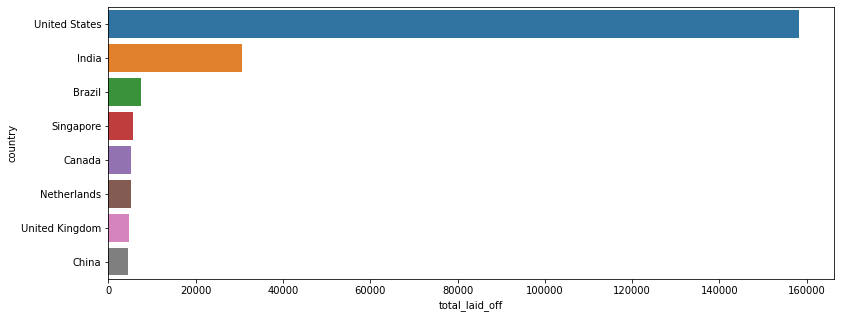

In [60]:
a,ax=plt.subplots(figsize=(8,4))
sns.barplot(data = pais , x = 'total_laid_off', y = 'country',  ax = ax).figure.set_size_inches(13, 5)
plt.show()

#cabe uma pizza

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1732 non-null   object 
 1   location             1732 non-null   object 
 2   industry             1727 non-null   object 
 3   total_laid_off       1218 non-null   float64
 4   percentage_laid_off  1161 non-null   float64
 5   date                 1731 non-null   object 
 6   stage                1728 non-null   object 
 7   country              1732 non-null   object 
 8   funds_raised         1604 non-null   float64
dtypes: float64(3), object(6)
memory usage: 121.9+ KB


In [62]:
# além do gráfico de barras padrão, relacionar com a data ()
# olhar o livrinho pra fazer o plot com os nomes
industria = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending = False).head(8).to_frame()
industria

,total_laid_off
industry,
Transportation,28645.0
Consumer,28594.0
Retail,27531.0
Finance,19858.0
Food,19406.0
Real Estate,16022.0
Travel,15476.0
Healthcare,11900.0


In [63]:
industria.reset_index()
industria = industria.reset_index()
industria

,industry,total_laid_off
0,Transportation,28645.0
1,Consumer,28594.0
2,Retail,27531.0
3,Finance,19858.0
4,Food,19406.0
5,Real Estate,16022.0
6,Travel,15476.0
7,Healthcare,11900.0


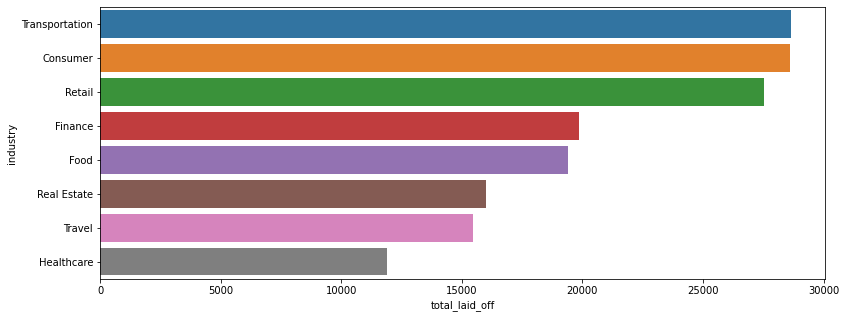

In [64]:
# add legenda
a,ax=plt.subplots(figsize=(11,4))
sns.barplot(data = industria , x = 'total_laid_off', y = 'industry',  ax = ax).figure.set_size_inches(13, 5)
plt.show()

In [65]:

company = df.groupby('company')['total_laid_off'].sum().sort_values(ascending = False).to_frame().head(8)
company


,total_laid_off
company,
Meta,11000.0
Amazon,10000.0
Uber,7585.0
Booking.com,4601.0
Cisco,4100.0
Peloton,4084.0
Carvana,4000.0
Better.com,3900.0


In [66]:
company.reset_index()
company = company.reset_index()
company

,company,total_laid_off
0,Meta,11000.0
1,Amazon,10000.0
2,Uber,7585.0
3,Booking.com,4601.0
4,Cisco,4100.0
5,Peloton,4084.0
6,Carvana,4000.0
7,Better.com,3900.0


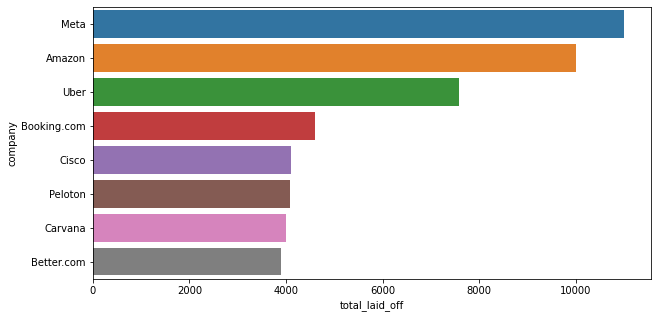

In [67]:
a,ax=plt.subplots(figsize=(11,4))
sns.barplot(data = company , x = 'total_laid_off', y = 'company', ax = ax).figure.set_size_inches(10, 5)
plt.show()

In [68]:
# não sei o que fazer com isso daqui
df.groupby('stage')['total_laid_off'].count().sort_values(ascending = False).to_frame().head(30)
df.groupby('stage')['total_laid_off'].sum().sort_values(ascending = False).to_frame().head(30)


,total_laid_off
stage,
IPO,96051.0
Unknown,34505.0
Acquired,18374.0
Series D,16413.0
Series C,16256.0
Series B,12929.0
Series E,9452.0
Series F,8345.0
Series H,6369.0


In [69]:
df.groupby('country')['total_laid_off', 'industry'].count()

<ipython-input-69-58e38950715c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('country')['total_laid_off', 'industry'].count()


,total_laid_off,industry
country,,
Argentina,5,5
Australia,19,34
Austria,2,2
Bahrain,0,1
Belgium,0,1
Brazil,49,54
Bulgaria,1,1
Canada,66,77
Chile,1,1


In [70]:
df.groupby('country').agg({'total_laid_off': 'sum', 'industry': 'count'}).head(15)

,total_laid_off,industry
country,,
Argentina,323.0,5
Australia,1215.0,34
Austria,470.0,2
Bahrain,0.0,1
Belgium,0.0,1
Brazil,7525.0,54
Bulgaria,120.0,1
Canada,5199.0,77
Chile,30.0,1


In [71]:
# Observando apenas o Brasil

In [72]:
brasil = df[df['country']=='Brazil']
brasil

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
37,Wildlife Studios,Sao Paulo,Consumer,300.0,0.20,2022-11-28,Unknown,Brazil,260.0
69,Kavak,Sao Paulo,Transportation,NaN,NaN,2022-11-18,Series E,Brazil,1600.0
171,Dock,Sao Paulo,Finance,190.0,0.12,2022-11-07,Private Equity,Brazil,280.0
250,Hotmart,Belo Horizonte,Marketing,227.0,0.12,2022-10-20,Series C,Brazil,127.0
342,99,Sao Paulo,Transportation,75.0,0.02,2022-09-20,Acquired,Brazil,244.0
367,Quicko,Sao Paulo,Transportation,60.0,NaN,2022-09-12,Acquired,Brazil,28.0
403,2TM,Sao Paulo,Crypto,100.0,0.15,2022-09-01,Unknown,Brazil,250.0
431,Loja Integrada,Sao Paulo,Retail,25.0,0.10,2022-08-25,Acquired,Brazil,NaN
459,Fluke,Sao Paulo,Other,83.0,0.82,2022-08-17,Seed,Brazil,NaN
463,Warren,Porto Alegre,Finance,50.0,NaN,2022-08-17,Series C,Brazil,104.0


In [73]:
type(brasil)

pandas.core.frame.DataFrame

In [74]:
# Gráficos em nível de Brasil

In [75]:
#industria

In [76]:
brasil_industria = brasil.groupby('industry')['total_laid_off'].sum().sort_values(ascending = False).head(15).to_frame()

In [77]:
brasil_industria.reset_index()
brasil_industria = brasil_industria.reset_index()
brasil_industria

,industry,total_laid_off
0,Finance,2424.0
1,Real Estate,885.0
2,Travel,667.0
3,Retail,615.0
4,Logistics,500.0
5,Fitness,467.0
6,Marketing,327.0
7,Consumer,311.0
8,Transportation,285.0
9,Food,270.0


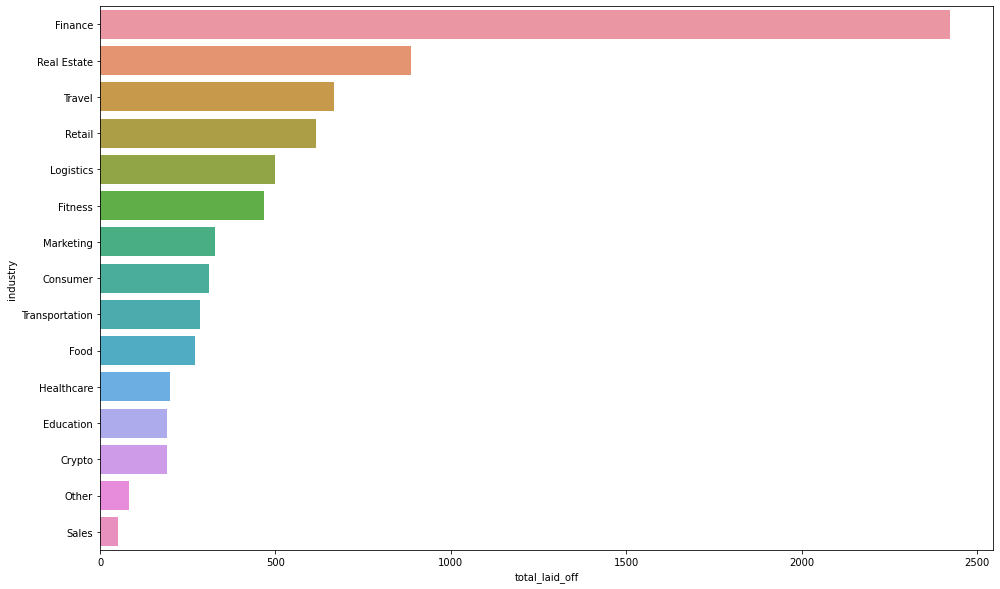

In [78]:
a,ax=plt.subplots(figsize=(11,4))
sns.barplot(data = brasil_industria , x = 'total_laid_off', y = 'industry',  ax = ax).figure.set_size_inches(16, 10)
plt.show()

In [79]:
#empresas

In [80]:
brasil_company = brasil.groupby('company')['total_laid_off'].sum().sort_values(ascending = False).head(15)

In [81]:
brasil_company.reset_index()
brasil_company = brasil_company.reset_index()
brasil_company

,company,total_laid_off
0,Stone,1300.0
1,Loft,637.0
2,Loggi,500.0
3,OYO,500.0
4,Gympass,467.0
5,Ebanx,402.0
6,Wildlife Studios,300.0
7,Facily,260.0
8,QuintoAndar,248.0
9,Hotmart,227.0


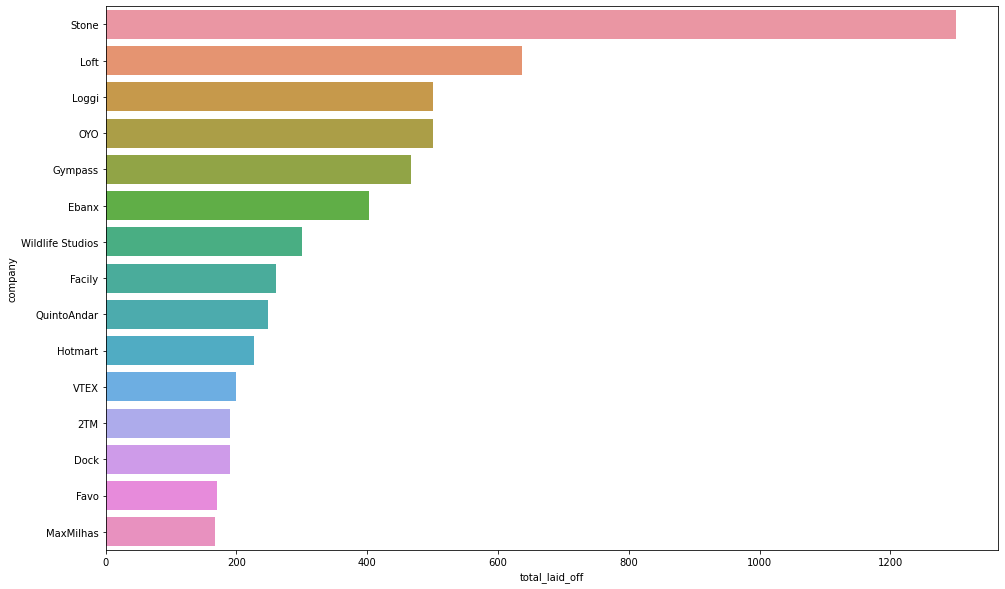

In [82]:
a,ax= plt.subplots(figsize = (11,4))
sns.barplot(data = brasil_company, x = 'total_laid_off', y = 'company', ax = ax).figure.set_size_inches(16, 10)
plt.show()

In [83]:
# tem empresa repetida /tratar porque tá errado 
brasil_company_funds = brasil.groupby('company')['funds_raised'].sum().sort_values(ascending = False).head(15)
brasil_company_funds

company
Kavak             3200.0
OYO               2400.0
Loft              2102.0
QuintoAndar       1090.0
Loggi              507.0
Facily             502.0
2TM                500.0
Ebanx              490.0
VTEX               365.0
MadeiraMadeira     338.0
Olist              322.0
Creditas           314.0
Gympass            300.0
Nomad              290.0
Dock               280.0
Name: funds_raised, dtype: float64

In [84]:
brasil_company_funds.reset_index()
brasil_company_funds = brasil_company_funds.reset_index()
brasil_company_funds

,company,funds_raised
0,Kavak,3200.0
1,OYO,2400.0
2,Loft,2102.0
3,QuintoAndar,1090.0
4,Loggi,507.0
5,Facily,502.0
6,2TM,500.0
7,Ebanx,490.0
8,VTEX,365.0
9,MadeiraMadeira,338.0


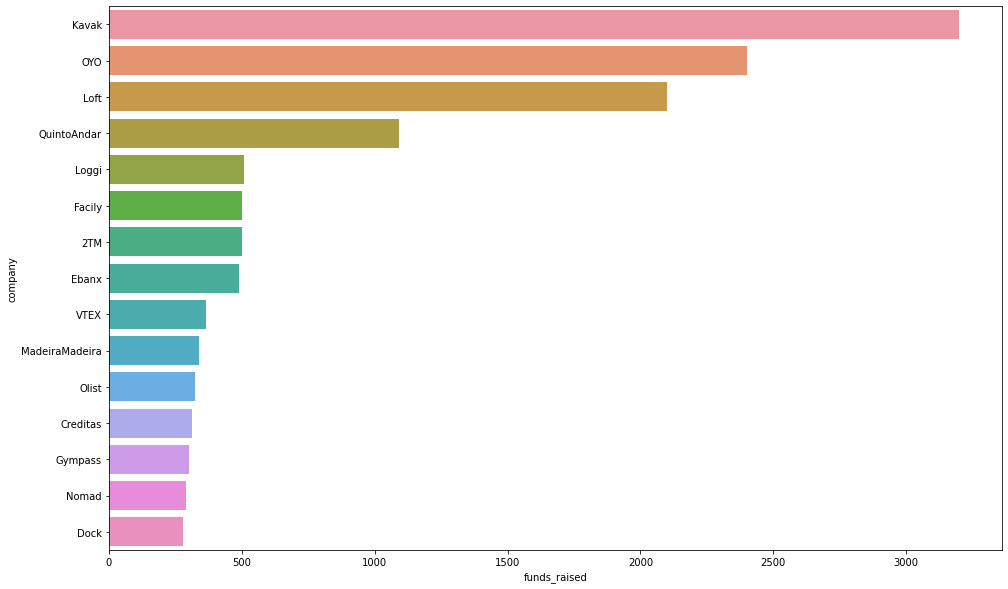

In [85]:
a,ax= plt.subplots(figsize = (11,4))
sns.barplot(data = brasil_company_funds, x = 'funds_raised', y = 'company', ax = ax).figure.set_size_inches(16, 10)
plt.show()

In [86]:
#Localização
cidades = brasil['location'].value_counts()

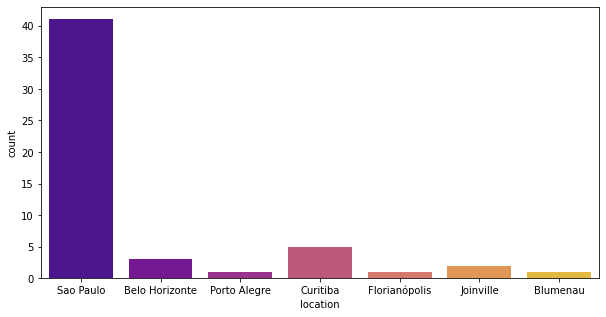

In [87]:
a,ax=plt.subplots(figsize=(10,5))

sns.countplot(x='location', data = brasil, palette="plasma", ax = ax)
plt.show()


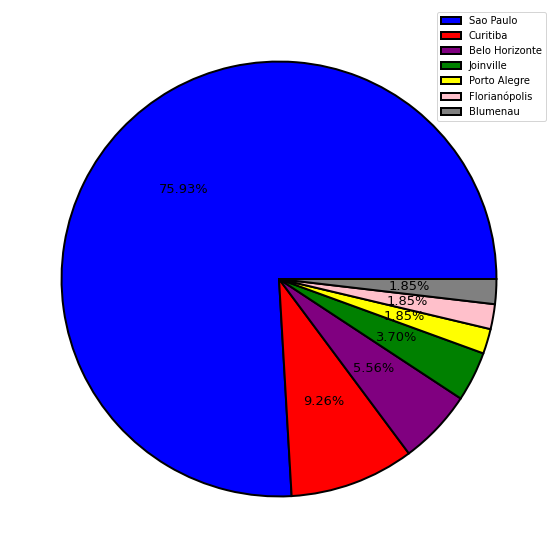

In [88]:
plt.figure(figsize = (10,10))
colors = ['blue', 'red','purple','green','yellow','pink','gray']
wedgeprops={"edgecolor":"black",'linewidth':2, 'antialiased': True}
plt.pie(cidades.values, autopct='%.2f%%', colors=colors, wedgeprops=wedgeprops,textprops={'fontsize': 13, 'color':'black'});
plt.legend(cidades.index, prop={'size':10})
plt.show()

In [89]:
df_time = pd.to_datetime(df['date']).dt.year
df_time

0       2022.0
1       2022.0
2       2022.0
3       2022.0
4       2022.0
         ...  
1727    2020.0
1728    2020.0
1729    2020.0
1730    2020.0
1731       NaN
Name: date, Length: 1732, dtype: float64

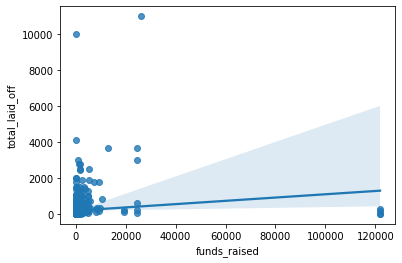

In [90]:
sns.regplot(data=df, x='funds_raised', y='total_laid_off', order=1)


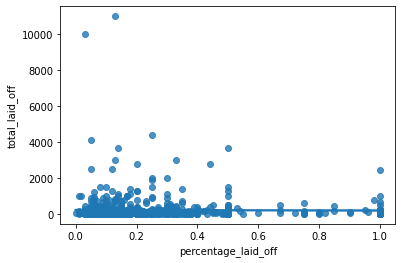

In [91]:
sns.regplot(data=df, x='percentage_laid_off', y='total_laid_off', order=1)


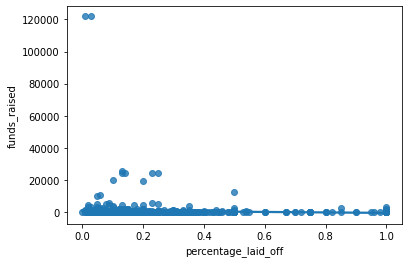

In [92]:
sns.regplot(data=df, x='percentage_laid_off', y='funds_raised', order=1)


In [93]:
#df['date'] = pd.to_datetime(df['date'])


In [98]:
data_col = pd.DatetimeIndex(df['date'])
df['ano'] = data_col.year
df['mes'] = data_col.month
df.head(5)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,ano,mes
0,Swyftx,Brisbane,Crypto,90.0,0.40,2022-12-05,Unknown,Australia,NaN,2022.0,12.0
1,OYO,Gurugram,Travel,600.0,NaN,2022-12-03,Series F,India,4000.0,2022.0,12.0
2,HealthifyMe,Bengaluru,Fitness,150.0,NaN,2022-12-03,Series C,India,100.0,2022.0,12.0
3,Bybit,Singapore,Crypto,NaN,0.30,2022-12-03,Unknown,Singapore,NaN,2022.0,12.0
4,Cognyte,Tel Aviv,Security,100.0,0.05,2022-12-02,Unknown,Israel,NaN,2022.0,12.0


In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732 entries, 0 to 1731
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1732 non-null   object 
 1   location             1732 non-null   object 
 2   industry             1727 non-null   object 
 3   total_laid_off       1218 non-null   float64
 4   percentage_laid_off  1161 non-null   float64
 5   date                 1731 non-null   object 
 6   stage                1728 non-null   object 
 7   country              1732 non-null   object 
 8   funds_raised         1604 non-null   float64
 9   ano                  1731 non-null   float64
 10  mes                  1731 non-null   float64
dtypes: float64(5), object(6)
memory usage: 149.0+ KB


In [100]:
layoff_years = df['year'] = df['date'].dt.year


AttributeError: ignored

In [ ]:
Layoff_years = df[['company', 'total_laid_off' , 'year' ]].reset_index(drop=True).total_laid_off.cumsum()
Layoff_years